# PRIDE NLP
NLP NHS for drug information knowledge graph

## Imports

In [60]:
import pandas as pd
import numpy as np
import re

## Data Preprocessing
Worked with files downloaded from:
http://ctdbase.org/downloads/;jsessionid=74BC65C36365CF4BCC193C670F9C670E#cd

In [61]:
#Chemical disease associations
#Fields:
#ChemicalName
#ChemicalID (MeSH identifier)
#CasRN (CAS Registry Number, if available)
#DiseaseName
#DiseaseID (MeSH or OMIM identifier)
#DirectEvidence ('|'-delimited list)
#InferenceGeneSymbol
#InferenceScore
#OmimIDs ('|'-delimited list)
#PubMedIDs ('|'-delimited list)

chemdisease = pd.read_csv('CTD_chemicals_diseases.csv.gz', compression='gzip',  skiprows=range(1, 29), 
                       names = ['ChemicalName',
                               'ChemicalID',
                               'CasRN',
                               'DiseaseName',
                               'DiseaseID',
                               'DirectEvidence',
                               'InferenceGeneSymbol',
                               'InferenceScore',
                               'OmimIDs',
                               'PubMedIDs'])
chemdisease = chemdisease[1:]
chemdisease.head()

,ChemicalName,ChemicalID,CasRN,DiseaseName,DiseaseID,DirectEvidence,InferenceGeneSymbol,InferenceScore,OmimIDs,PubMedIDs
1,06-Paris-LA-66 protocol,C046983,NaN,Precursor Cell Lymphoblastic Leukemia-Lymphoma,MESH:D054198,therapeutic,NaN,NaN,NaN,4519131
2,10074-G5,C534883,NaN,Adenocarcinoma,MESH:D000230,NaN,MYC,4.08,NaN,26432044
3,10074-G5,C534883,NaN,Adenocarcinoma of Lung,MESH:D000077192,NaN,MYC,4.32,NaN,26656844|27602772
4,10074-G5,C534883,NaN,Alopecia,MESH:D000505,NaN,AR,4.51,NaN,15902657
5,10074-G5,C534883,NaN,Androgen-Insensitivity Syndrome,MESH:D013734,NaN,AR,6.86,300068|312300,1303262|8281139


In [62]:
#limit to only parkinson
parkinsongenesdf = chemdisease[chemdisease['DiseaseName'].str.contains('parkinson', flags=re.IGNORECASE, regex=True)].reset_index(drop=True)
#drop fields we aren't interested in
parkinsongenesdf.drop(['CasRN', 'DirectEvidence', 'InferenceGeneSymbol', 
                       'InferenceScore', 'OmimIDs','PubMedIDs'], axis = 1, inplace = True)
parkinsongenesdf.head()

,ChemicalName,ChemicalID,DiseaseName,DiseaseID
0,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300
1,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302
2,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300
3,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300
4,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300


In [63]:
#Chemical–GO enriched associations
#Fields:
#ChemicalName
#ChemicalID (MeSH identifier)
#CasRN (CAS Registry Number, if available)
#Ontology
#GOTermName
#GOTermID
#HighestGOLevel
#PValue
#CorrectedPValue
#TargetMatchQty
#TargetTotalQty
#BackgroundMatchQty
#BackgroundTotalQty

chemenrich = pd.read_csv('CTD_chemicals_diseases.csv.gz', compression='gzip',  skiprows=range(1, 29), 
                       names = ['ChemicalName',
                               'ChemicalID',
                               'CasRN',
                               'Ontology',
                               'GOTermName',
                               'GOTermID',
                               'HighestGOLevel',
                               'PValue',
                               'CorrectedPValue',
                               'TargetMatchQty',
                               'TargetTotalQty',
                               'BackgroundMatchQty',
                               'BackgroundTotalQty'])
chemenrich = chemenrich[1:]
chemenrich.head()

,ChemicalName,ChemicalID,CasRN,Ontology,GOTermName,GOTermID,HighestGOLevel,PValue,CorrectedPValue,TargetMatchQty,TargetTotalQty,BackgroundMatchQty,BackgroundTotalQty
1,06-Paris-LA-66 protocol,C046983,NaN,Precursor Cell Lymphoblastic Leukemia-Lymphoma,MESH:D054198,therapeutic,NaN,NaN,NaN,4519131,NaN,NaN,NaN
2,10074-G5,C534883,NaN,Adenocarcinoma,MESH:D000230,NaN,MYC,4.08,NaN,26432044,NaN,NaN,NaN
3,10074-G5,C534883,NaN,Adenocarcinoma of Lung,MESH:D000077192,NaN,MYC,4.32,NaN,26656844|27602772,NaN,NaN,NaN
4,10074-G5,C534883,NaN,Alopecia,MESH:D000505,NaN,AR,4.51,NaN,15902657,NaN,NaN,NaN
5,10074-G5,C534883,NaN,Androgen-Insensitivity Syndrome,MESH:D013734,NaN,AR,6.86,300068|312300,1303262|8281139,NaN,NaN,NaN


In [64]:
#limit to only parkinson
parkinsonendf = chemenrich[chemenrich['Ontology'].str.contains('parkinson', flags=re.IGNORECASE, regex=True)].reset_index(drop=True)
parkinsonendf.drop(['CasRN', 'GOTermID', 'HighestGOLevel', 'CorrectedPValue', 
                    'TargetTotalQty', 'BackgroundMatchQty','BackgroundTotalQty'], axis = 1, inplace = True)
parkinsonendf.head()

,ChemicalName,ChemicalID,Ontology,GOTermName,PValue,TargetMatchQty
0,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300,4.27,20558393
1,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302,4.56,26457621
2,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300,17.90,28215578
3,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300,17.90,21318773
4,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300,17.90,17188257


In [65]:
#Gene vocabulary
#GeneSymbol
#GeneName
#GeneID (NCBI Gene identifier)
#AltGeneIDs (alternative NCBI Gene identifiers; '|'-delimited list)
#Synonyms ('|'-delimited list)
#BioGRIDIDs ('|'-delimited list)
#PharmGKBIDs ('|'-delimited list)
#UniprotIDs ('|'-delimited list)

genesdf = pd.read_csv('CTD_genes.csv.gz', compression='gzip', skiprows=range(1, 29),
                      names = ['GeneSymbol',
                               'GeneName',
                               'GeneID',
                               'AltGeneIDs',
                               'Synonyms',
                               'BioGRIDIDs',
                               'PharmGKBIDs',
                               'UniprotIDs'])
genesdf = genesdf[1:]
genesdf.drop(['AltGeneIDs','Synonyms','BioGRIDIDs',
                           'PharmGKBIDs','UniprotIDs'], axis = 1, inplace = True)
genesdf.head()

,GeneSymbol,GeneName,GeneID
1,03B03F,"DNA segment, 03B03F (Research Genetics)",27777.0
2,03B03R,"DNA segment, 03B03R (Research Genetics)",27778.0
3,03.MMHAP34FRA.SEQ,"DNA segment, 03.MMHAP34FRA.seq",53288.0
4,064YA,NaN,5658107.0
5,102G4T7,"DNA segment, 102g4T7",56573.0


In [66]:
#Chemical–gene interaction
#Fields:
#ChemicalName
#ChemicalID (MeSH identifier)
#CasRN (CAS Registry Number, if available)
#GeneSymbol
#GeneID (NCBI Gene identifier)
#GeneForms ('|'-delimited list)
#Organism (scientific name)
#OrganismID (NCBI Taxonomy identifier)
#Interaction
#InteractionActions ('|'-delimited list)
#PubMedIDs ('|'-delimited list)

chemgene = pd.read_csv('CTD_chem_gene_ixns.csv.gz', compression='gzip', skiprows=range(1, 29), 
                       names = ['ChemicalName',
                               'ChemicalID',
                               'CasRN',
                               'GeneSymbol',
                               'GeneID',
                               'GeneForms',
                               'Organism',
                               'OrganismID',
                               'Interaction',
                               'InteractionActions',
                               'PubMedIDs'])
chemgene = chemgene[1:]
chemgene.drop(['CasRN','PubMedIDs'], axis = 1, inplace = True)
chemgene.head()

,ChemicalName,ChemicalID,GeneSymbol,GeneID,GeneForms,Organism,OrganismID,Interaction,InteractionActions
1,10074-G5,C534883,AR,367.0,protein,Homo sapiens,9606.0,10074-G5 affects the reaction [MYC protein res...,affects^reaction|increases^expression
2,10074-G5,C534883,AR,367.0,protein,Homo sapiens,9606.0,10074-G5 inhibits the reaction [EPHB2 protein ...,decreases^reaction|increases^expression
3,10074-G5,C534883,AR,367.0,protein,Homo sapiens,9606.0,10074-G5 results in decreased expression of AR...,decreases^expression
4,10074-G5,C534883,AR,367.0,protein,Homo sapiens,9606.0,10074-G5 results in decreased expression of AR...,decreases^expression
5,10074-G5,C534883,EPHB2,2048.0,protein,Homo sapiens,9606.0,10074-G5 inhibits the reaction [EPHB2 protein ...,decreases^reaction|increases^expression


In [67]:
#Top Chemical–gene interaction types: 
# CTD curates chemical–gene and –protein interactions in vertebrates and invertebrates using this hierarchical vocabulary of interaction types
#Fields:
#TypeName
#Code
#Description
#ParentCode

geneinteractiontypes = pd.read_csv('CTD_chem_gene_ixn_types.csv')
geneinteractiontypes.head()

,# TypeName,Code,Description,ParentCode
0,abundance,abu,The abundance of a chemical (if chemical synth...,NaN
1,activity,act,An elemental function of a molecule.,NaN
2,binding,b,A molecular interaction.,NaN
3,cotreatment,w,Involving the use of two or more chemicals sim...,NaN
4,expression,exp,The expression of a gene product.,NaN


## merge and create dfs

Merge and create dfs with information that may be useful for knowledge graph:
gene, chemical, protein

In [68]:
#merge parkinsongenesdf and chemgene for Parkinson's
chem_df_merged = parkinsongenesdf.merge(chemgene, on=['ChemicalID','ChemicalName'], how='left')
chem_df_merged.head()

,ChemicalName,ChemicalID,DiseaseName,DiseaseID,GeneSymbol,GeneID,GeneForms,Organism,OrganismID,Interaction,InteractionActions
0,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300,ABCB1,5243.0,protein,Homo sapiens,9606.0,ABCB1 protein results in increased transport o...,increases^transport
1,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300,CYP2C19,1557.0,protein,NaN,NaN,"10,11-dihydro-10-hydroxycarbamazepine results ...",decreases^activity
2,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302,ABCB1,5243.0,protein,Homo sapiens,9606.0,ABCB1 protein results in increased transport o...,increases^transport
3,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302,CYP2C19,1557.0,protein,NaN,NaN,"10,11-dihydro-10-hydroxycarbamazepine results ...",decreases^activity
4,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300,BAX,581.0,protein,Mus musculus,10090.0,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,decreases^reaction|increases^expression


In [69]:
#Add gene name field
chemgene_df_merged = chem_df_merged.merge(genesdf, on=['GeneID','GeneSymbol'], how='left')
chemgene_df_merged.head()

,ChemicalName,ChemicalID,DiseaseName,DiseaseID,GeneSymbol,GeneID,GeneForms,Organism,OrganismID,Interaction,InteractionActions,GeneName
0,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300,ABCB1,5243.0,protein,Homo sapiens,9606.0,ABCB1 protein results in increased transport o...,increases^transport,ATP binding cassette subfamily B member 1
1,"10,11-dihydro-10-hydroxycarbamazepine",C039775,Parkinson Disease,MESH:D010300,CYP2C19,1557.0,protein,NaN,NaN,"10,11-dihydro-10-hydroxycarbamazepine results ...",decreases^activity,cytochrome P450 family 2 subfamily C member 19
2,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302,ABCB1,5243.0,protein,Homo sapiens,9606.0,ABCB1 protein results in increased transport o...,increases^transport,ATP binding cassette subfamily B member 1
3,"10,11-dihydro-10-hydroxycarbamazepine",C039775,"Parkinson Disease, Secondary",MESH:D010302,CYP2C19,1557.0,protein,NaN,NaN,"10,11-dihydro-10-hydroxycarbamazepine results ...",decreases^activity,cytochrome P450 family 2 subfamily C member 19
4,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,C476756,Parkinson Disease,MESH:D010300,BAX,581.0,protein,Mus musculus,10090.0,10-(6'-ubiquinonyl)decyltriphenylphosphonium b...,decreases^reaction|increases^expression,"BCL2 associated X, apoptosis regulator"


In [70]:
chemgene_df_merged.count()

ChemicalName          113093950
ChemicalID            113093950
DiseaseName           113093950
DiseaseID             113093950
GeneSymbol            113093773
GeneID                113093903
GeneForms             112359053
Organism              112413824
OrganismID            112413824
Interaction           113093903
InteractionActions    113093903
GeneName              112999666
dtype: int64

In [71]:
# Code from Kaggle to reduce memory usage 
# https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [72]:
props, NAlist = reduce_mem_usage(chemgene_df_merged)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 11216.898727416992  MB
******************************
Column:  GeneID
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  OrganismID
dtype before:  float64
dtype after:  uint32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  10354.060363769531  MB
This is  92.3076923076923 % of the initial size
_________________

_________________

['GeneID', 'OrganismID']


In [73]:
chemgene_df_merged.drop(['ChemicalID','DiseaseID','GeneID','OrganismID','GeneName'], axis = 1, inplace = True)

In [74]:
df = chemgene_df_merged.sample(frac=0.000001, random_state=1)

In [75]:
df.count()

ChemicalName          113
DiseaseName           113
GeneSymbol            113
GeneForms             113
Organism              113
Interaction           113
InteractionActions    113
dtype: int64

## Knowledge graph

In [ ]:
### networkx can only look at small number of nodes

In [102]:
# https://towardsdatascience.com/creating-knowledge-graphs-from-resumes-and-traver-56016426f4fb
# https://networkx.org/documentation/stable/tutorial.html
# https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675

import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
G = nx.Graph()

<function matplotlib.pyplot.show(*args, **kw)>

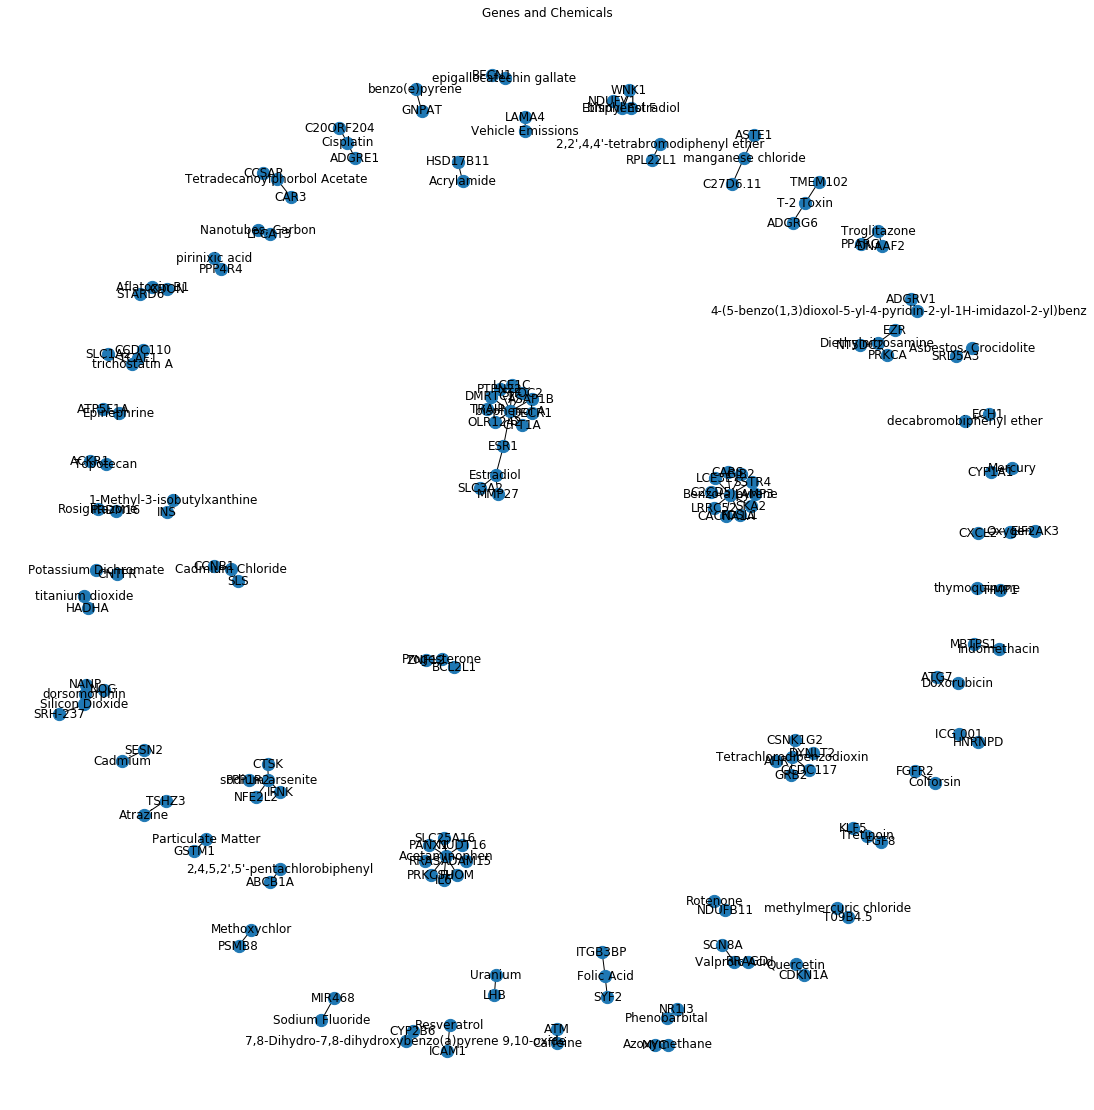

In [114]:
G = nx.from_pandas_edgelist(df,"GeneSymbol", "ChemicalName")
figure(figsize = (15,15))
nx.draw(G, with_labels = True, pos=nx.spring_layout(G), node_size=150)
plt.title("Genes and Chemicals")
plt.axis("off")
plt.show

In [91]:
G = nx.from_pandas_edgelist(df,"GeneSymbol", "ChemicalName",edge_attr='InteractionActions')
layout = nx.spring_layout(G, iterations=50)
labels = {e: G.edges[e]['InteractionActions'] for e in G.edges}

<function matplotlib.pyplot.show(*args, **kw)>

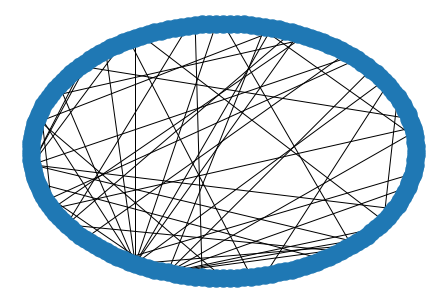

In [96]:
nx.draw_shell(G)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

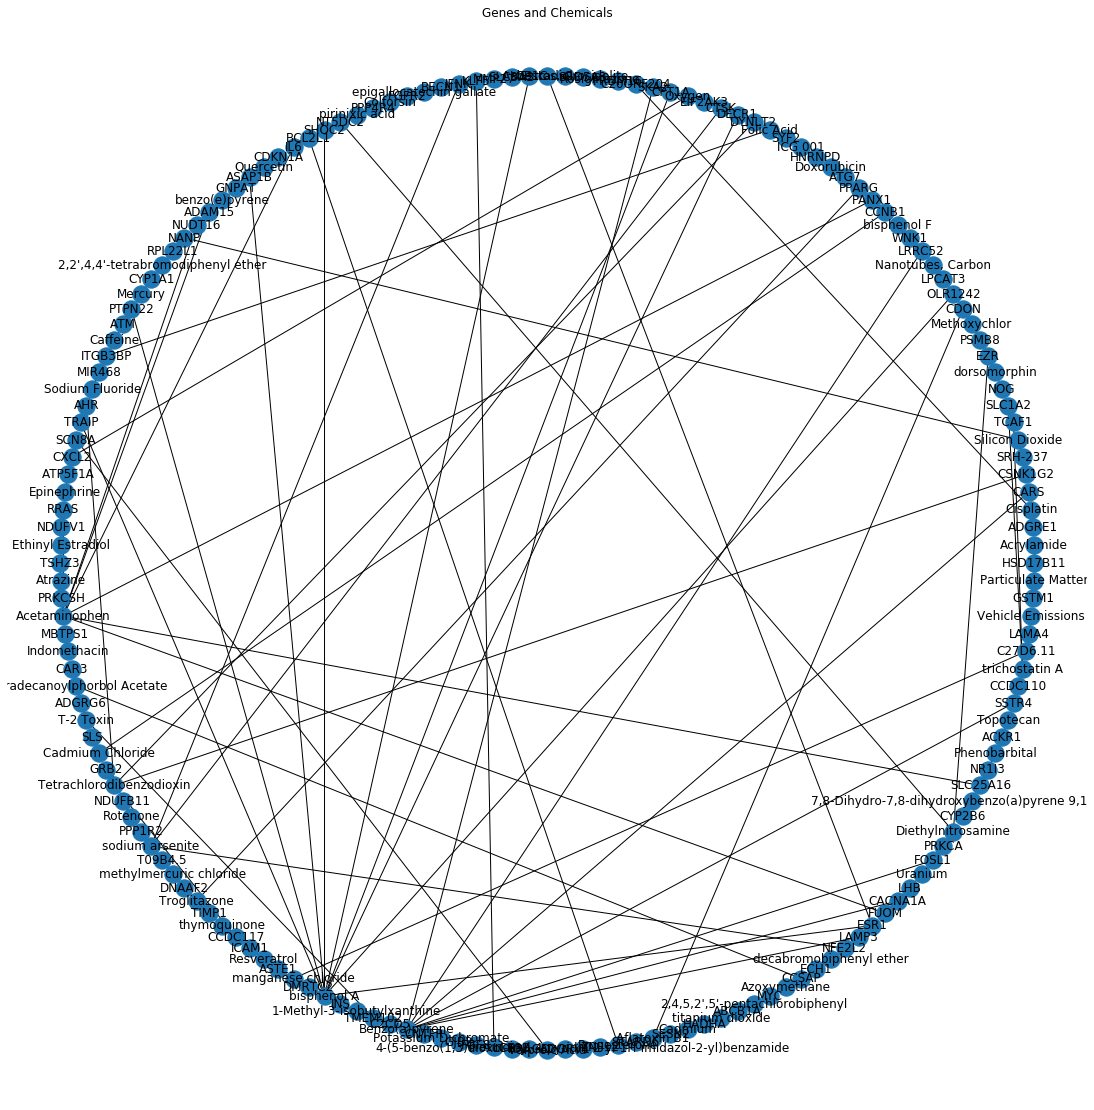

In [99]:
figure(figsize = (15,15))
nx.draw_shell(G, with_labels = True)
plt.title("Genes and Chemicals")
plt.axis("off")
plt.show

In [139]:
G = nx.from_pandas_edgelist(df,"GeneSymbol", "ChemicalName",edge_attr='InteractionActions')
layout = nx.spring_layout(G)
labels = {e: G.edges[e]['InteractionActions'] for e in G.edges}

<function matplotlib.pyplot.show(*args, **kw)>

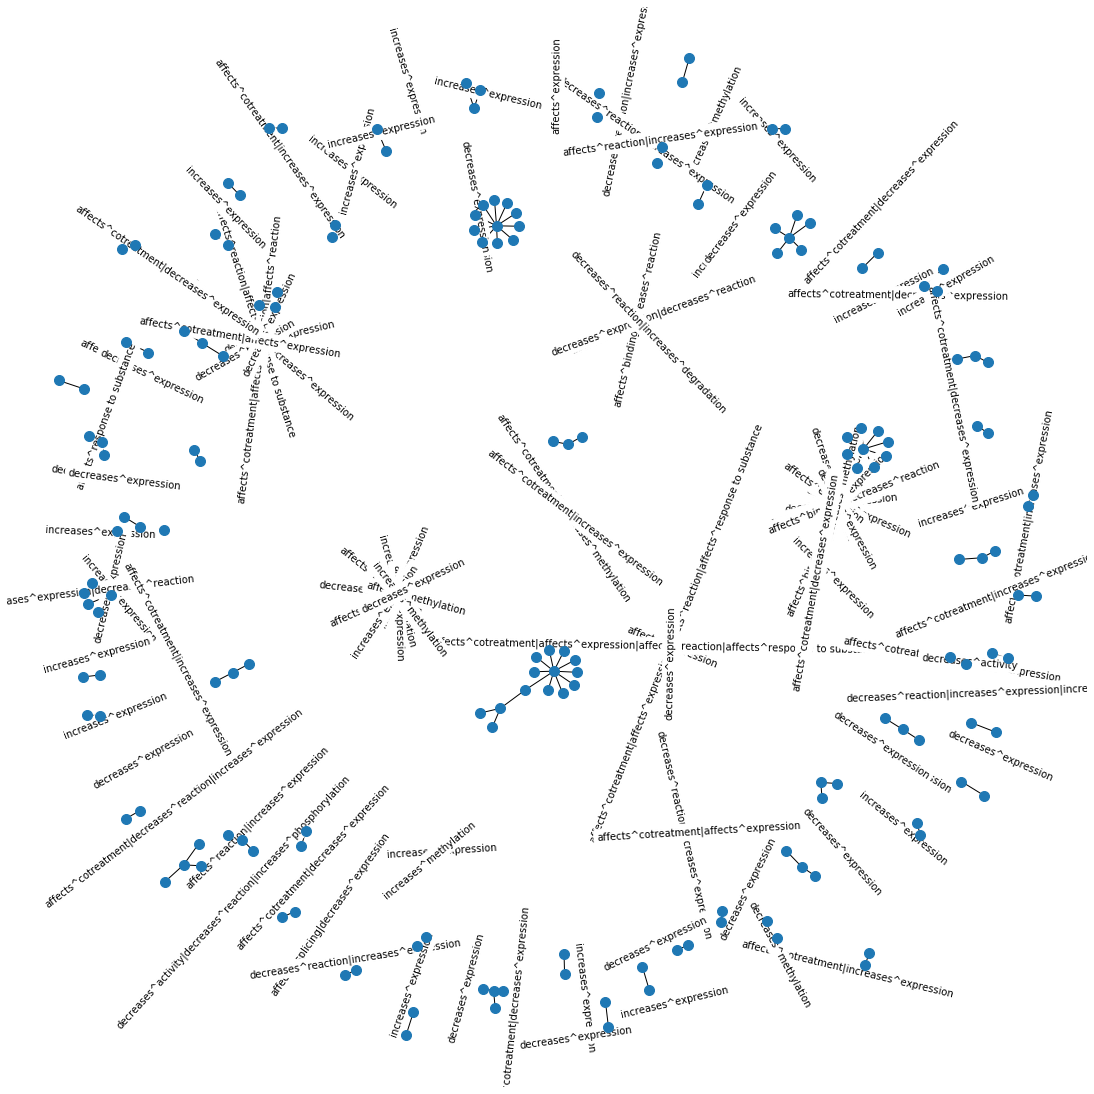

In [146]:
figure(figsize = (15,15))
nx.draw(G, with_labels = False, node_size=100)
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels, label_pos=.1)
nx.draw_networkx_edges(G, layout, width=3, alpha=0.5, edge_color="#cccccc")
plt.axis("off")
plt.show

In [78]:
G = nx.from_pandas_edgelist(df,"GeneSymbol", "GeneForms")

<function matplotlib.pyplot.show(*args, **kw)>

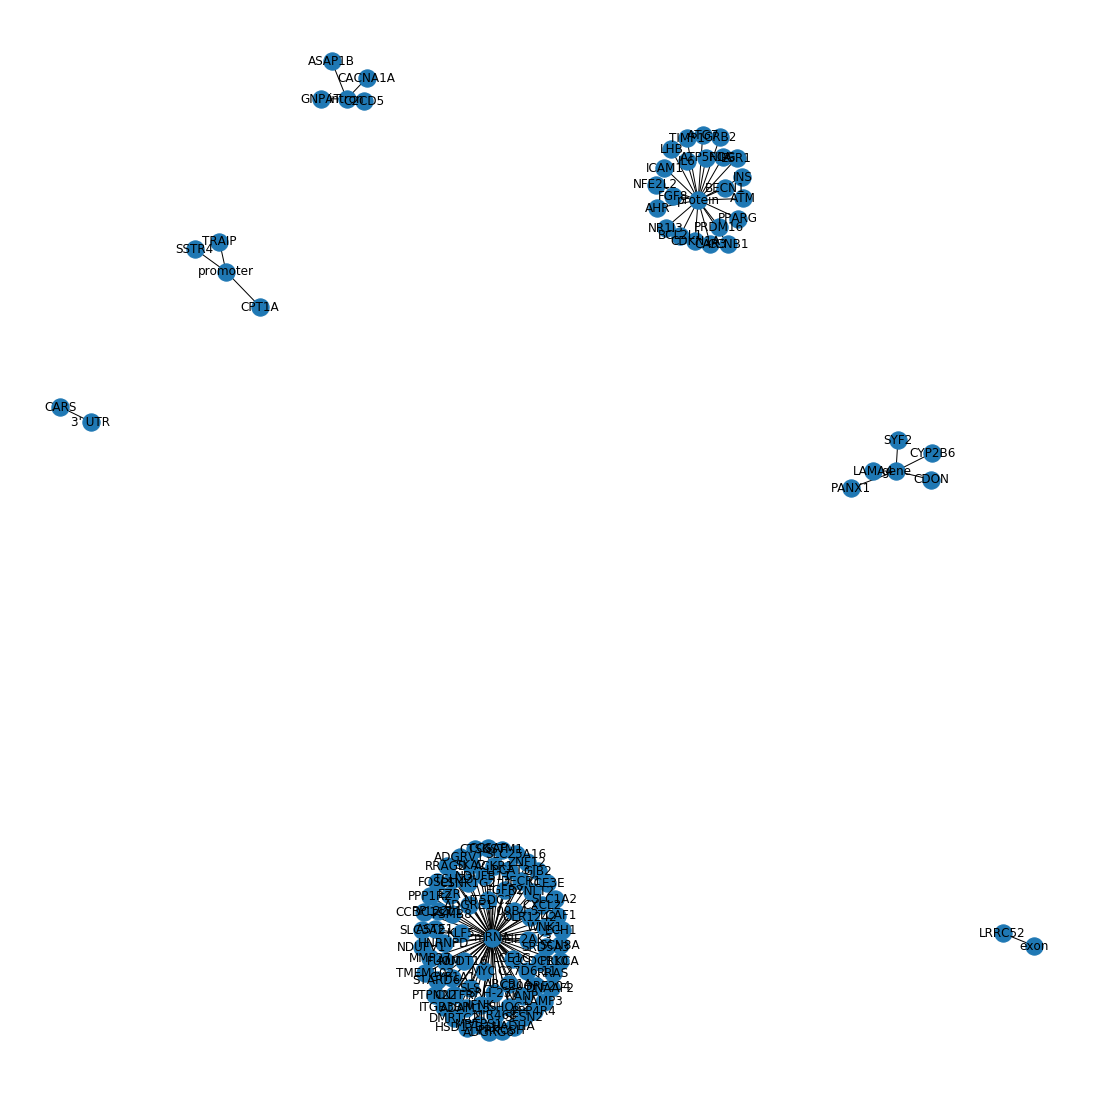

In [79]:
figure(figsize = (15,15))
nx.draw(G, with_labels = True)
plt.axis("off")
plt.show